The Methods that I will try: 
1. LSTM
2. GRU
3. RF
4. Prophet
5. RNN
6. GBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('EDA_weather/model_input.csv',delimiter=';')
df.drop(['location'],axis=1,inplace=True)
# remove instances where lceq_avg is 0
df = df[df['lceq_avg'] != 0]

In [3]:
# split into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['lceq_avg','lcpeak_avg'],axis=1), df['lcpeak_avg'], test_size=0.2, random_state=40)

### Random Forest Implementation with hyperparameter tuning using random search ---- Test R2 score:  0.8826292629716137

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# find the best hyperparameters for the Random Forest using RandomizedSearchCV
# n_estimators = number of trees in the forest
# max_features = number of features to consider at every split
# max_depth = maximum number of levels in each tree
# min_samples_split = minimum number of samples required to split a node
# min_samples_leaf = minimum number of samples required at each leaf node
# bootstrap = method of selecting samples for training each tree

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(x_train, y_train)

In [16]:
# show the best parameters
rf_random.best_params_

{'n_estimators': 890,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [60]:
# create a tree using the best parameters
rf = RandomForestRegressor(n_estimators= 890,
    min_samples_split= 5,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_depth= 80,
    bootstrap= False)

In [ ]:
# import r2score
from sklearn.metrics import r2_score
rf.fit(x_train,y_train)
Rf_train_pred = rf.predict(x_train)
Rf_test_pred = rf.predict(x_test)

r2_score(y_test,Rf_test_pred)

In [63]:
# show metrics scores for the decision tree model
print('Random Forest')
print('Train R2 score: ',r2_score(y_train,Rf_train_pred))
print('Test R2 score: ',r2_score(y_test,Rf_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,Rf_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,Rf_test_pred)))

Random Forest
Train R2 score:  0.9906077882250667
Test R2 score:  0.8826292629716137
Train RMSE score:  0.5502775355013841
Test RMSE score:  1.9546686559854591


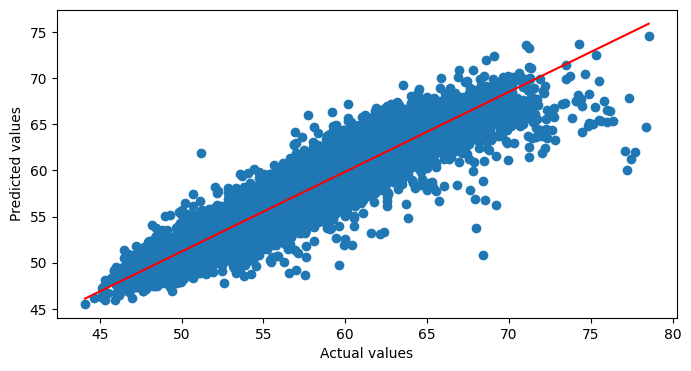

In [64]:
import matplotlib.pyplot as plt
# create a scatterplot of the predicted values vs the actual values
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,Rf_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, Rf_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

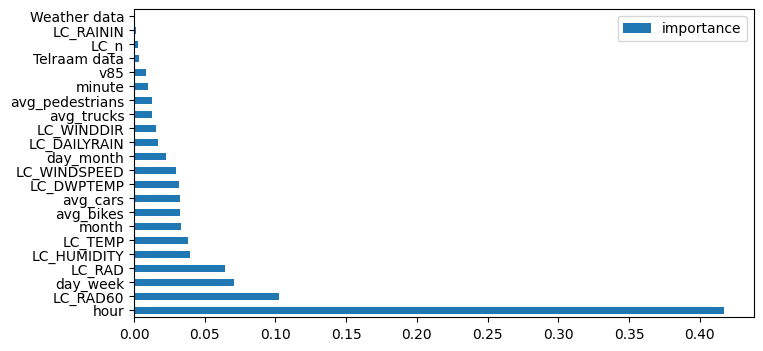

In [66]:
# show feature importance in a horizontal bar chart
feature_importances = pd.DataFrame(rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='barh')
plt.show()

Some features are irrelevant, removing may help with the overfitting problem

In [ ]:
df_reduced = df.drop(['LC_RAININ','LC_n','v85'])

### Extreme Gradient Boosting Implementation without hyperparameter tuning --- Test R2 score:  0.8918867960864459

XGBoost
Train R2 score:  0.9761471497479626
Test R2 score:  0.8918867960864459
Train RMSE score:  0.8720796903488381
Test RMSE score:  1.8652162851391338


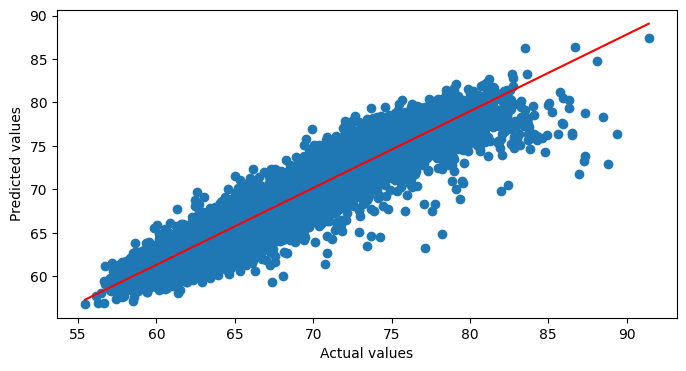

In [8]:
# import libraries for xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create a xgboost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 1000)

# fit the model
xg_reg.fit(x_train,y_train)

# predict the values
xgb_train_pred = xg_reg.predict(x_train)
xgb_test_pred = xg_reg.predict(x_test)

# show metrics scores for the xgboost model
from sklearn.metrics import r2_score
print('XGBoost')
print('Train R2 score: ',r2_score(y_train,xgb_train_pred))
print('Test R2 score: ',r2_score(y_test,xgb_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,xgb_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,xgb_test_pred)))

# create a scatterplot of the predicted values vs the actual values
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,xgb_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, xgb_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

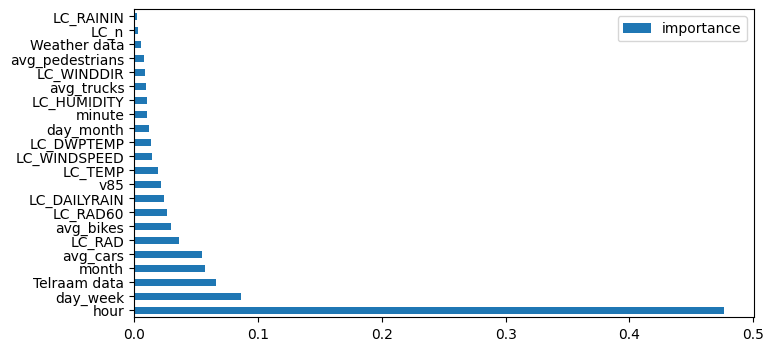

In [9]:
# show feature importance in a horizontal bar chart
feature_importances = pd.DataFrame(xg_reg.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='barh')
plt.show()

Repeating XGBOOST with dropped features to overcome overfitting

XGBoost
Train R2 score:  0.9469931663770079
Test R2 score:  0.8769452089184866
Train RMSE score:  1.3000257743827468
Test RMSE score:  1.9899359290262508


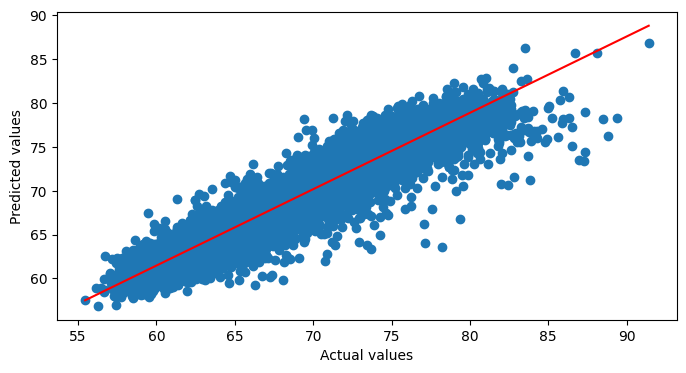

In [22]:
# import libraries for xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create a xgboost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 1000)

# fit the model
xg_reg.fit(x_train.drop(['LC_RAININ','LC_n','avg_pedestrians','v85','Weather data','LC_WINDDIR','minute','LC_DWPTEMP','LC_HUMIDITY'],axis=1),y_train)

# predict the values
xgb_train_pred = xg_reg.predict(x_train.drop(['LC_RAININ','LC_n','avg_pedestrians','v85','Weather data','LC_WINDDIR','minute','LC_DWPTEMP','LC_HUMIDITY'],axis=1))
xgb_test_pred = xg_reg.predict(x_test.drop(['LC_RAININ','LC_n','avg_pedestrians','v85','Weather data','LC_WINDDIR','minute','LC_DWPTEMP','LC_HUMIDITY'],axis=1))

# show metrics scores for the xgboost model
from sklearn.metrics import r2_score
print('XGBoost')
print('Train R2 score: ',r2_score(y_train,xgb_train_pred))
print('Test R2 score: ',r2_score(y_test,xgb_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,xgb_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,xgb_test_pred)))

# create a scatterplot of the predicted values vs the actual values
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,xgb_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, xgb_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

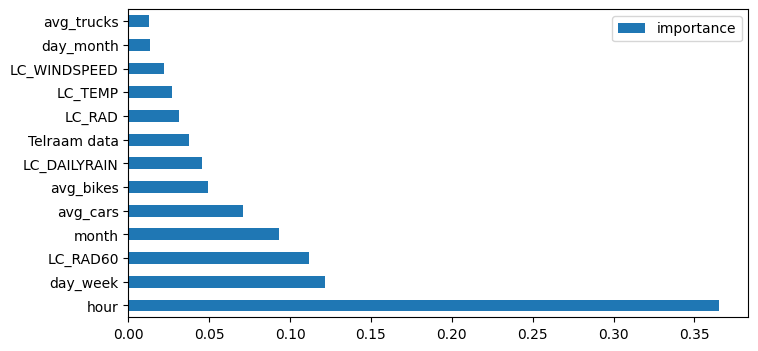

In [23]:
# show feature importance in a horizontal bar chart
feature_importances = pd.DataFrame(xg_reg.feature_importances_,index = x_train.drop(['LC_RAININ','LC_n','avg_pedestrians','v85','Weather data','LC_WINDDIR','minute','LC_DWPTEMP','LC_HUMIDITY'],axis=1).columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='barh')
plt.show()

Trying with only hour, day_week and month as features

XGBoost
Train R2 score:  0.7394007728865938
Test R2 score:  0.7324860811407168
Train RMSE score:  2.8825217521226234
Test RMSE score:  2.934019672570738


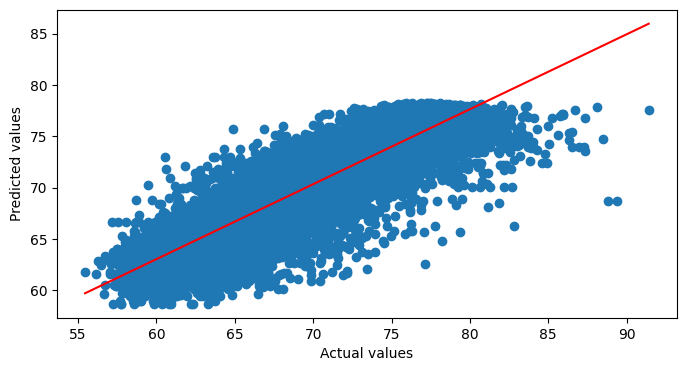

In [26]:
# import libraries for xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create a xgboost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 1000)

# create x_train_2 with only 'hour','day_week','month'
x_train_2 = x_train[['hour','day_week','month']]
x_test_2 = x_test[['hour','day_week','month']]
# fit the model
xg_reg.fit(x_train_2,y_train)

# predict the values
xgb_train_pred = xg_reg.predict(x_train_2)
xgb_test_pred = xg_reg.predict(x_test_2)

# show metrics scores for the xgboost model
from sklearn.metrics import r2_score
print('XGBoost')
print('Train R2 score: ',r2_score(y_train,xgb_train_pred))
print('Test R2 score: ',r2_score(y_test,xgb_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,xgb_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,xgb_test_pred)))

# create a scatterplot of the predicted values vs the actual values
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,xgb_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, xgb_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

### LSTM Implementation ---- Test R2 score:  0.7710763271672757

In [46]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))

Epoch 1/50
1314/1314 [==============================] - 24s 15ms/step - loss: 979.8142
Epoch 2/50
1314/1314 [==============================] - 20s 15ms/step - loss: 70.1841
Epoch 3/50
1314/1314 [==============================] - 20s 15ms/step - loss: 45.1964
Epoch 4/50
1314/1314 [==============================] - 20s 15ms/step - loss: 44.1467
Epoch 5/50
1314/1314 [==============================] - 20s 15ms/step - loss: 42.1416
Epoch 6/50
1314/1314 [==============================] - 20s 15ms/step - loss: 39.8496
Epoch 7/50
1314/1314 [==============================] - 20s 15ms/step - loss: 38.3845
Epoch 8/50
1314/1314 [==============================] - 20s 15ms/step - loss: 37.0839
Epoch 9/50
1314/1314 [==============================] - 20s 15ms/step - loss: 36.2764
Epoch 10/50
1314/1314 [==============================] - 20s 16ms/step - loss: 33.9991
Epoch 11/50
1314/1314 [==============================] - 21s 16ms/step - loss: 27.2076
Epoch 12/50
1314/1314 [============================

ValueError: Polynomial must be 1d only.

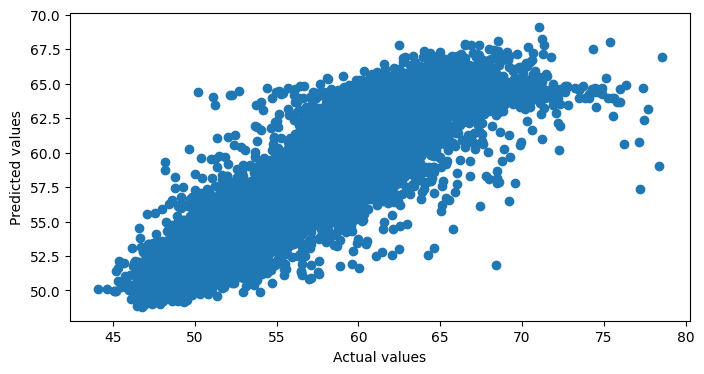

In [74]:
# import libraries for lstm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# reshape the data
x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))

# create a lstm model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fit the model
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

# predict the values
lstm_train_pred = model.predict(x_train)
lstm_test_pred = model.predict(x_test)

# show metrics scores for the lstm model
print('LSTM')
print('Train R2 score: ',r2_score(y_train,lstm_train_pred))
print('Test R2 score: ',r2_score(y_test,lstm_test_pred))
print('Train RMSE score: ',np.sqrt(mean_squared_error(y_train,lstm_train_pred)))
print('Test RMSE score: ',np.sqrt(mean_squared_error(y_test,lstm_test_pred)))

# create a scatterplot of the predicted values vs the actual values
plt.rcParams['figure.figsize'] = [8,4]
plt.scatter(y_test,lstm_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# add the line of best fit
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, lstm_test_pred, 1))(np.unique(y_test)),color='red')
plt.show()

### Prophet Implementation (Prophet install doesn't work on apple silicon, so here is the link for the online notebook: https://app.datacamp.com/workspace/w/0b7e6a72-68e0-492b-9382-706bc85378a4/edit ) ---- R2 score: 0.7543855615172617

In [4]:
# import libraries for prophet 
from prophet import Prophet
import pandas as pd

Creating the correct format DF for prophet

In [7]:
# create a list with only 2022 values and the length of the dataframe
year_2022 = ['2022'] * len(df)
df['year'] = year_2022
df['month'] = df['month'].astype(str)
df['day'] = df['day_month'].astype(str)
df['hour'] = df['hour'].astype(str)
df['minute'] = df['minute'].astype(str)

# Pad single-digit month, day, hour, and minute values with leading zeros if necessary
df['month'] = df['month'].str.zfill(2)
df['day'] = df['day'].str.zfill(2)
df['hour'] = df['hour'].str.zfill(2)
df['minute'] = df['minute'].str.zfill(2)

# Create 'DS' column by concatenating and formatting year, month, day, hour, and minute columns
df['ds'] = pd.to_datetime(df['year'] + '-' + df['month'] + '-' + df['day'] +
                          ' ' + df['hour'] + ':' + df['minute'] + ':00')

In [8]:
# only keep the DS and lceak_avg columns
df = df[['ds','lcpeak_avg']]
# rename lcpeak_avg to y
df = df.rename(columns={'lcpeak_avg': 'y'})
df.head()

,ds,y
0,2022-01-01 00:00:00,76.1733
1,2022-01-01 00:10:00,70.5935
2,2022-01-01 00:20:00,71.6283
3,2022-01-01 00:30:00,69.4174
4,2022-01-01 00:40:00,66.8824


In [11]:
# save the dataframe to a csv file
df.to_csv('prophet.csv',index=False)

### What if we want to predict when sound is likely to exceed the 70 Decibels barrier ? This one is working very well !!!

In [6]:
df.head()

,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85,Telraam data,Weather data,lceq_avg,lcpeak_avg
0,1,1,6,0,0,0,0.00,0,0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0,0,59.9981,76.1733
1,1,1,6,0,10,91,11.65,38,0,0.0,...,13.14485,0.0,0.0,0.0,0.0,0.0,0,1,55.4889,70.5935
2,1,1,6,0,20,90,11.50,37,0,0.0,...,13.14540,0.0,0.0,0.0,0.0,0.0,0,1,57.2715,71.6283
3,1,1,6,0,30,90,11.50,38,0,0.0,...,13.16009,0.0,0.0,0.0,0.0,0.0,0,1,55.4906,69.4174
4,1,1,6,0,40,90,11.50,37,0,0.0,...,13.14488,0.0,0.0,0.0,0.0,0.0,0,1,53.9855,66.8824


In [4]:
# how many times is lcpeak_avg > 70
df[df['lceq_avg'] > 70].count()[0]/df.count()[0]
# how many times is lcpeak_avg > 80
df[df['lcpeak_avg'] > 75].count()[0]/df.count()[0]

0.3029749329069834

In [6]:
df_binary=df.copy()
df_binary['lcpeak_avg'] = np.where(df_binary['lcpeak_avg'] > 75, 1, 0)
df_binary['lceq_avg']= np.where(df_binary['lceq_avg'] > 70, 1, 0)

In [20]:
df_binary.head()

,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85,Telraam data,Weather data,lceq_avg,lcpeak_avg
0,1,1,6,0,0,0,0.00,0,0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1,1,6,0,10,91,11.65,38,0,0.0,...,13.14485,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,1,1,6,0,20,90,11.50,37,0,0.0,...,13.14540,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,1,1,6,0,30,90,11.50,38,0,0.0,...,13.16009,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,1,1,6,0,40,90,11.50,37,0,0.0,...,13.14488,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [7]:
# split into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_binary.drop(['lceq_avg','lcpeak_avg'],axis=1), df_binary['lcpeak_avg'], test_size=0.2, random_state=40)

#### Gradient Boosting Classifier

In [ ]:
# perform random search to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
random_grid = {'n_estimators': [100, 500, 1000],
                'max_depth': [3, 5, 10, 15, 20],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1],
                'alpha': [0, 5, 10, 15, 20]}
xgb_model = xgb.XGBClassifier(objective ='binary:logistic')
xgb_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2, random_state=40, n_jobs = -1)
# show the best parameters
xgb_random.fit(x_train,y_train)
xgb_random.best_params_

XGBoost
Train accuracy score:  0.9205824272560729
Test accuracy score:  0.8682908260373049
Train precision score:  0.8097027222991233
Test precision score:  0.7311745052685685
Sensitivity:  0.8938108702481935
Specificity:  0.8572013651877133


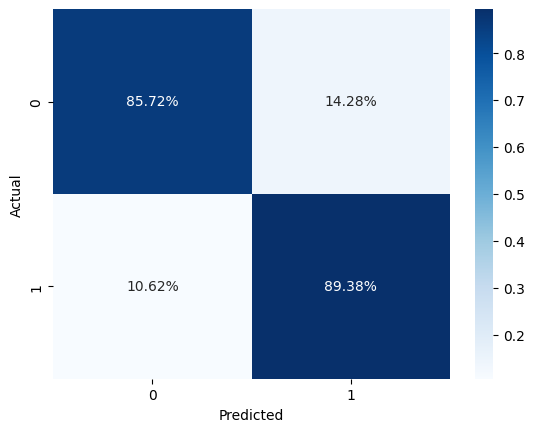

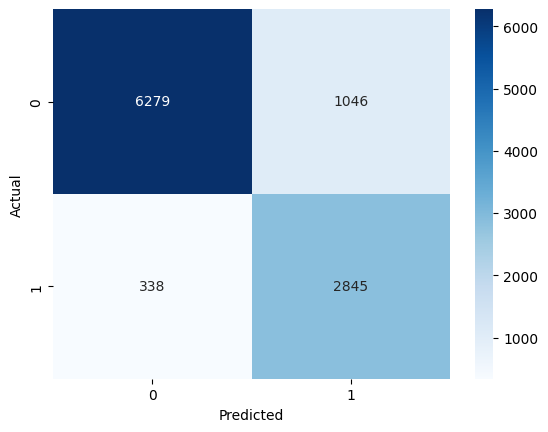

In [8]:
# import libraries for xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# create a xgboost model for binary classification
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.01,
                max_depth = 20, alpha = 5, n_estimators = 1000)

# fit the model
xg_reg.fit(x_train,y_train)

# predict the probabilities of 1 and adjust the threshold to 0.3
xgb_train_pred = xg_reg.predict_proba(x_train)[:,1]
xgb_train_pred = np.where(xgb_train_pred > 0.3, 1, 0)
xgb_test_pred = xg_reg.predict_proba(x_test)[:,1]
xgb_test_pred = np.where(xgb_test_pred > 0.3, 1, 0)

# show performance for the classification model
print('XGBoost')
print('Train accuracy score: ',accuracy_score(y_train,xgb_train_pred))
print('Test accuracy score: ',accuracy_score(y_test,xgb_test_pred))
print('Train precision score: ',precision_score(y_train,xgb_train_pred))
print('Test precision score: ',precision_score(y_test,xgb_test_pred))

# show sensitivity and specificity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,xgb_test_pred).ravel()
print('Sensitivity: ',tp/(tp+fn))
print('Specificity: ',tn/(tn+fp))

# show the confusion matrix as a heatmap using percentages wih x and y labels
import seaborn as sns
cm = confusion_matrix(y_test,xgb_test_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# show the confusion matrix as a heatmap using counts wih x and y labels
cm = confusion_matrix(y_test,xgb_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# save the model
import pickle
pickle.dump(xg_reg, open('xgboost_model.pkl', 'wb'))

This is nice but the problem is that we have a higly imbalanced dataset, so we are predicting a lot of false positives. Acually not that much !

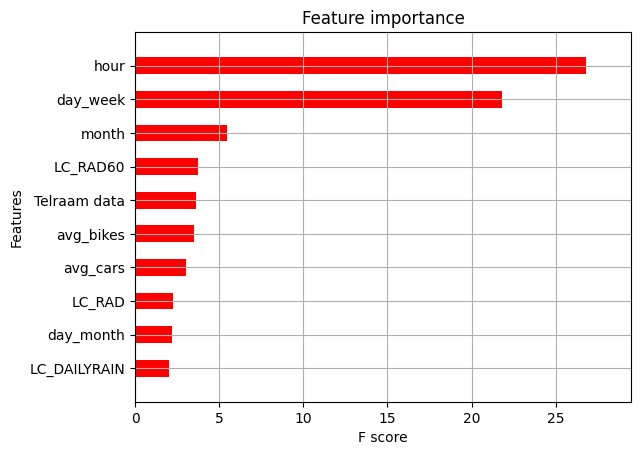

In [15]:
# show feature imprtance in horizontal bar chart with nice colors
xgb.plot_importance(xg_reg,importance_type='gain',max_num_features=10,height=0.5,show_values=False,color='red')
plt.show()

Nice to see that we already have a lot of predictive power with only 3 features!

Checking if there is a lot of corr between hour and Telraam data, because intuitively there should be but apparently not ...

In [19]:
# check the correlation between Telraam data variable and hour variable
df[['Telraam data','hour']].corr()

,Telraam data,hour
Telraam data,1.000000,-0.015256
hour,-0.015256,1.000000


<AxesSubplot: xlabel='hour'>

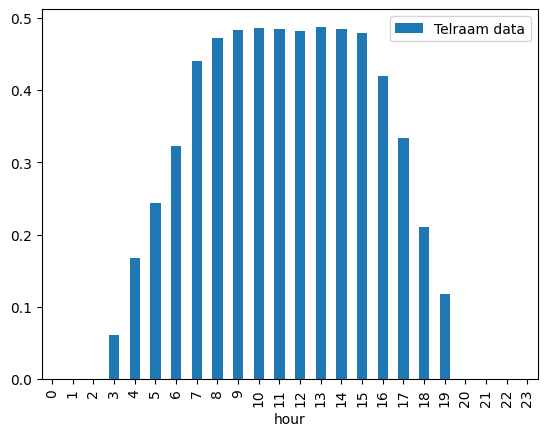

In [20]:
# show bar chart or hour and Telraam data
df[['Telraam data','hour']].groupby('hour').mean().plot.bar()

### We are missing Telraam data from 16h to 23h, is this a problem ? 

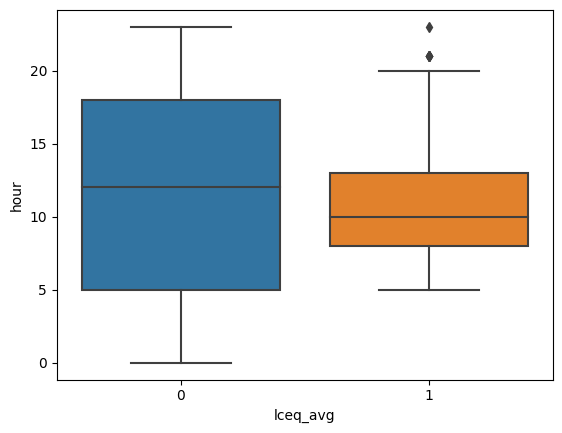

In [10]:
# grouped boxplot by lcpeak_avg, with hour on y axis
sns.boxplot(x='lceq_avg',y='hour',data=df_binary)
plt.show()

According to the boxplots, the sound barrier is most of time exceeded before 16h. So having the correct telraam data will not particularl help detect the outliers. 

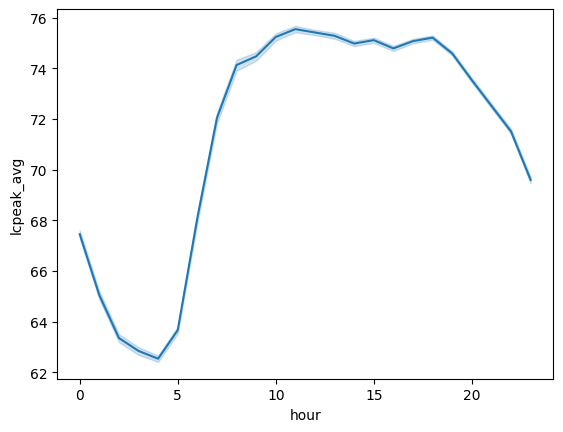

In [14]:
# line plot of lcpeak_avg by hour
sns.lineplot(x='hour',y='lcpeak_avg',data=df)    
plt.show()

I also want to know if the sound profiles are the same or not for each different sound measurement location -- They are more or less! Naamsestraat is more 'noisy' during the night (probably cause it's closest to the oude markt), Naamsestraat 81 is the noisiest on average (probably cause it's close to the big road intersection), and Vrijthof is the quietest (probably cause it's in the old city hall)

In [18]:
df_sound=pd.read_csv('EDA_weather/data/final_noise_data.csv')

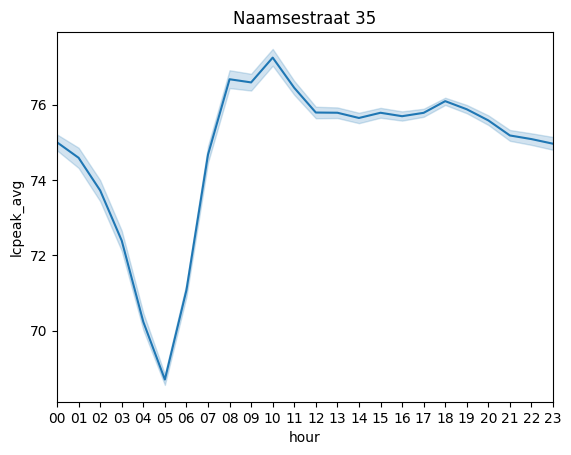

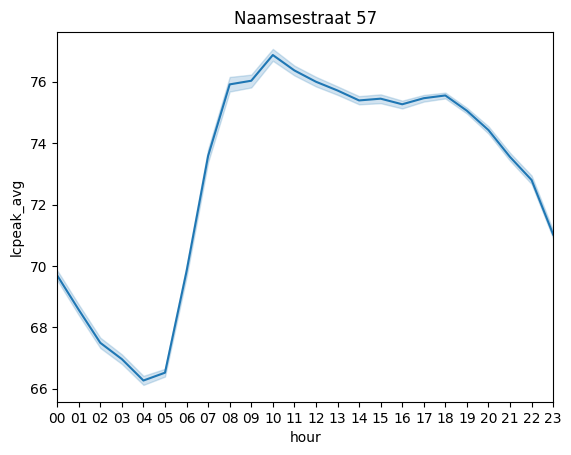

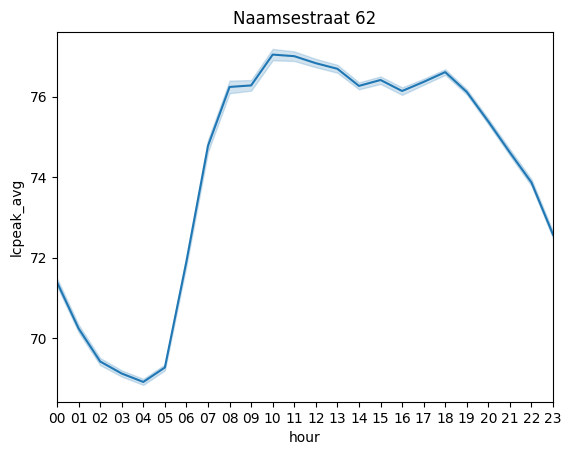

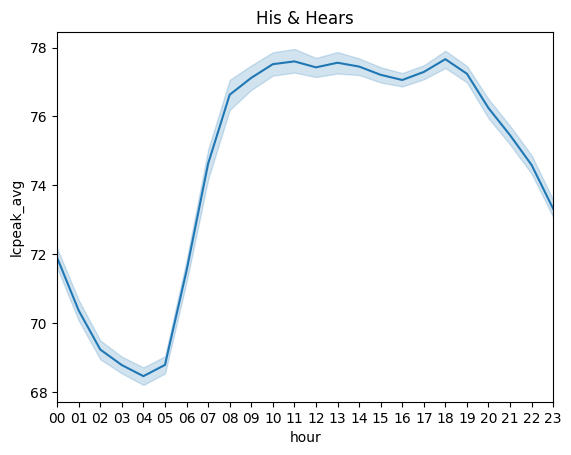

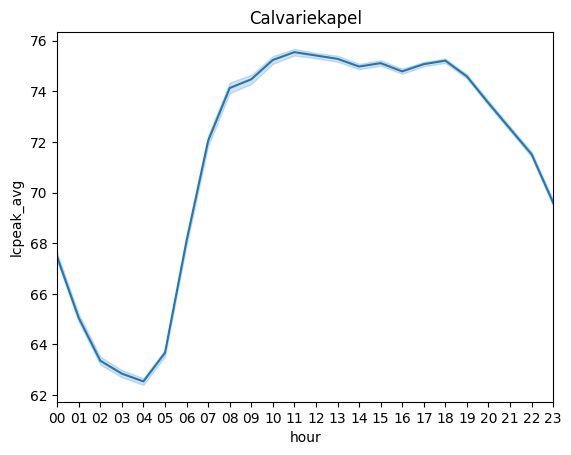

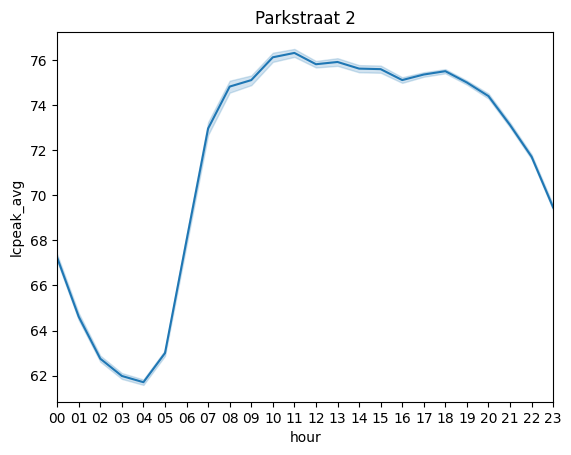

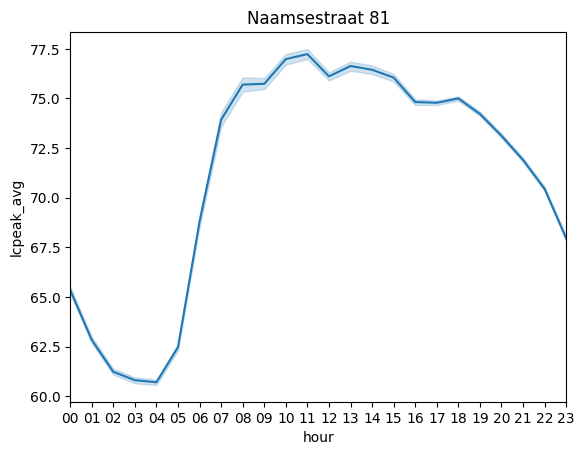

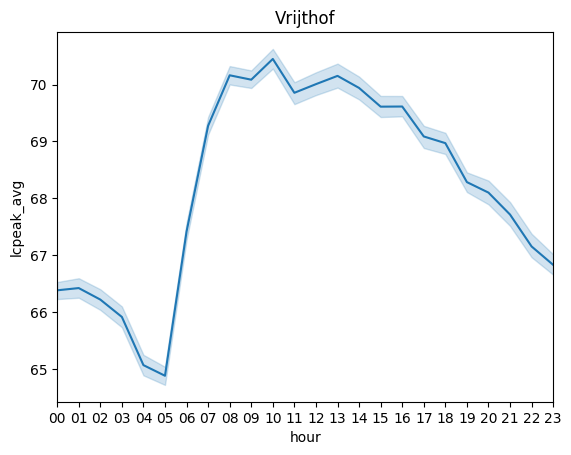

In [28]:
df_sound['hour'] = df_sound['10_min_interval_start_time'].str[:2]
# for each different location in the location column, show a line plot of lcpeak_avg by hour. the x axis should start at 00 and end with 23
for location in df_sound['location'].unique():
    sns.lineplot(x='hour',y='lcpeak_avg',data=df_sound[df_sound['location']==location].sort_values(by='hour'))
    plt.xlim(0, 23)
    plt.title(location)
    plt.show()
